## Problem Statement 
Given are 6 distinguishing factors that can influence the price of a used device. Your objective as a data scientist is to build a machine learning model that can predict the price of used electronic devices based on the given factors.

## Data Description:-
The unzipped folder will have the following files.

- Train.csv –  2326 observations.
- Test.csv –  997 observations.
- Sample Submission – Sample format for the submission.

**Target Variable: Price**

## Evaluation Metrics

from sklearn.metrics import mean_squared_log_error

np.sqrt(mean_squared_log_error( y_test, predictions ))


#### RMSLE - Root Mean Squared Log Error .

This metric is used when the Target variable is converted into Log(Target).
so instead of looking at RMSLE, you can look for RMSE (generally we use this). You can convert the predictions to ypred = exp(predictions)
and then np.sqrt(meansquarederror(y_test, ypred)) will give the final RMSE.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [3]:
df_train = pd.read_csv(r'C:\Users\INTEL\Desktop\All\Ineuron\Hack\Used_Electronics_Participants_Data\train.csv')
df_test = pd.read_csv(r'C:\Users\INTEL\Desktop\All\Ineuron\Hack\Used_Electronics_Participants_Data\test.csv')

In [4]:
df_train.shape,df_test.shape

((2326, 7), (997, 6))

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   2326 non-null   int64 
 1   Model_Info              2326 non-null   object
 2   Additional_Description  2326 non-null   object
 3   Locality                2326 non-null   int64 
 4   City                    2326 non-null   int64 
 5   State                   2326 non-null   int64 
 6   Price                   2326 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 127.3+ KB


## Display first 5 row of train data set

In [6]:
df_train.head()

,Brand,Model_Info,Additional_Description,Locality,City,State,Price
0,1,name0 name234 64gb space grey,1yesr old mobile number 999two905two99 bill c...,878,8,2,15000
1,1,phone 7 name42 name453 new condition box acce...,101004800 1010065900 7000,1081,4,0,18800
2,1,name0 x 256gb leess used good condition,1010010000 seperate screen guard 3 back cover...,495,11,4,50000
3,1,name0 6s plus 64 gb space grey,without 1010020100 id 1010010300 colour 10100...,287,10,7,16500
4,1,phone 7 sealed pack brand new factory outet p...,101008700 10100000 xs max 64 gb made 10100850...,342,4,0,26499


## Predictors Exploration

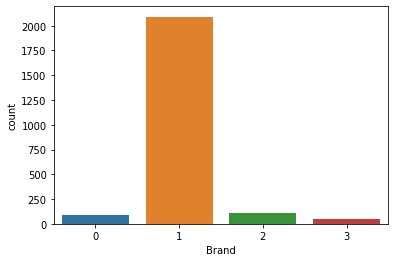

In [7]:
sns.countplot(df_train['Brand'])

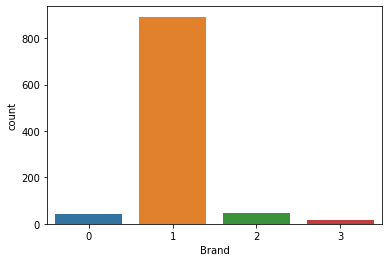

In [8]:
sns.countplot(df_test['Brand'])

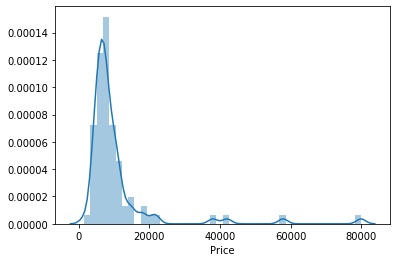

In [9]:
sns.distplot(df_train[df_train['Brand']==0]['Price'])

In [10]:
df_train[df_train['Brand']==0]['Price'].median()

7500.0

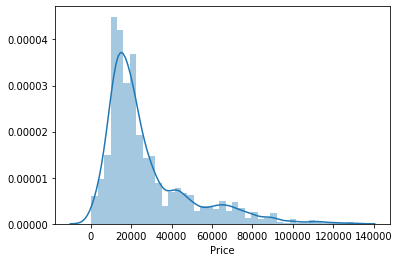

In [11]:
sns.distplot(df_train[df_train['Brand']==1]['Price'])

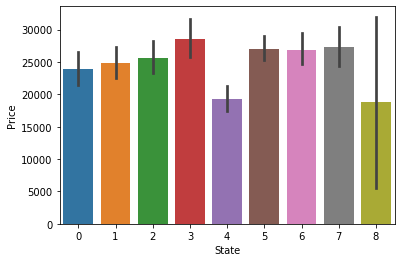

In [12]:
sns.barplot(x='State',y='Price',data=df_train)

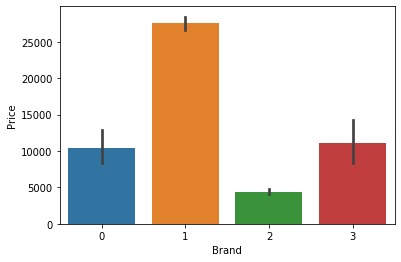

In [13]:
sns.barplot(x='Brand',y='Price',data=df_train)

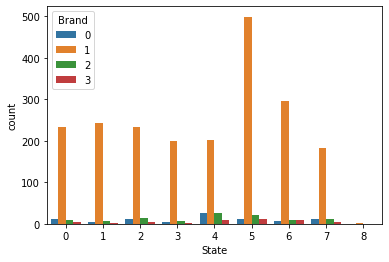

In [14]:
sns.countplot(x='State',data=df_train,hue='Brand')

In [15]:
df_train[df_train['Brand']==1]['Price'].median()

20000.0

## New Features - Train Test 

In [16]:
brand_sell_state_train = df_train.groupby('Brand')['State'].count().to_dict()
brand_sell_state_test = df_test.groupby('Brand')['State'].count().to_dict()

#
brand_max_state_train = df_train.groupby('Brand')['State'].max().to_dict()
brand_max_state_test = df_test.groupby('Brand')['State'].max().to_dict()

#
brand_min_state_train = df_train.groupby('Brand')['State'].min().to_dict()
brand_min_state_test = df_test.groupby('Brand')['State'].min().to_dict()

In [17]:
brand_sell_state_train,brand_sell_state_test

({0: 85, 1: 2091, 2: 105, 3: 45}, {0: 42, 1: 892, 2: 46, 3: 17})

In [18]:
 df_train.groupby('Brand')['Locality'].count().to_dict()

{0: 85, 1: 2091, 2: 105, 3: 45}

In [19]:
df_train['Sales_Brand_Statewise'] = df_train['Brand'].map(brand_sell_state_train)
df_test['Sales_Brand_Statewise'] = df_test['Brand'].map(brand_sell_state_test)
#
df_train['brand_max_state_train'] = df_train['Brand'].map(brand_max_state_train)
df_test['brand_max_state_train'] = df_test['Brand'].map(brand_max_state_train)
#
df_train['brand_min_state_train'] = df_train['Brand'].map(brand_min_state_train)
df_test['brand_min_state_train'] = df_test['Brand'].map(brand_min_state_train)

#### Preprocessing Model_info - Text to numbers 

In [21]:
import re

In [22]:
re.sub("\s*\d\s*"," ","name0 name234 64gb space grey")

'name name     gb space grey'

In [23]:
re.sub('[^A-Za-z0-9]+'," ","name0 name234 64gb space grey")

'name0 name234 64gb space grey'

In [24]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
def clean_text(text):
    text = text.lower()
    # remove words with numbers 
    text = re.sub("\s*\d\s*"," ",text)
    # remove special characters if any
    text = re.sub('[^A-Za-z0-9]+'," ",text)
    return text


In [26]:
df_train['Model_info_clean'] = df_train['Model_Info'].apply(lambda x: clean_text(x))
df_test['Model_info_clean'] = df_test['Model_Info'].apply(lambda x: clean_text(x))

In [27]:
df_train.head(3)

,Brand,Model_Info,Additional_Description,Locality,City,State,Price,Sales_Brand_Statewise,brand_max_state_train,brand_min_state_train,Model_info_clean
0,1,name0 name234 64gb space grey,1yesr old mobile number 999two905two99 bill c...,878,8,2,15000,2091,8,0,name name gb space grey
1,1,phone 7 name42 name453 new condition box acce...,101004800 1010065900 7000,1081,4,0,18800,2091,8,0,phone name name new condition box accessories
2,1,name0 x 256gb leess used good condition,1010010000 seperate screen guard 3 back cover...,495,11,4,50000,2091,8,0,name x gb leess used good condition


In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\INTEL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
from nltk.corpus import stopwords
stop_words = [word  for word in set(stopwords.words('english'))]
stop_words

['or',
 'been',
 'its',
 'very',
 'him',
 'against',
 'your',
 'after',
 'whom',
 's',
 'ain',
 'while',
 'ours',
 'do',
 'does',
 'most',
 'from',
 'own',
 'd',
 'at',
 'll',
 'a',
 'their',
 'before',
 'themselves',
 'did',
 "you're",
 "that'll",
 'she',
 'down',
 'yourselves',
 'other',
 "weren't",
 'again',
 'more',
 'who',
 'all',
 'then',
 'both',
 'but',
 'won',
 'being',
 'for',
 "you'd",
 'here',
 'some',
 'having',
 'those',
 "don't",
 'which',
 "aren't",
 'when',
 'isn',
 'until',
 "needn't",
 'i',
 'yours',
 'about',
 'in',
 'hers',
 'only',
 't',
 'her',
 'be',
 'few',
 'mustn',
 "didn't",
 'if',
 "hasn't",
 'my',
 'no',
 'such',
 "couldn't",
 'myself',
 'shouldn',
 'so',
 'y',
 'that',
 'once',
 'what',
 "mightn't",
 'each',
 'through',
 'had',
 'further',
 'should',
 'ourselves',
 'am',
 'why',
 'didn',
 'itself',
 "mustn't",
 "it's",
 'they',
 'doing',
 "you'll",
 'you',
 'with',
 'haven',
 'because',
 'he',
 'between',
 'couldn',
 "wouldn't",
 "doesn't",
 "hadn't",
 "s

In [30]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90,min_df=0,max_features=50,stop_words=stop_words)
tfidf_vectorizer.fit(df_train['Model_info_clean'])
tfidf_train = tfidf_vectorizer.transform(df_train['Model_info_clean'])
tfidf_test = tfidf_vectorizer.transform(df_test['Model_info_clean'])

In [31]:
tfidf_train.shape,tfidf_test.shape

((2326, 50), (997, 50))

In [32]:
tfidf_train_df = pd.DataFrame(tfidf_train.toarray(),columns=tfidf_vectorizer.get_feature_names())
tfidf_test_df = pd.DataFrame(tfidf_test.toarray(),columns=tfidf_vectorizer.get_feature_names())

In [33]:
train = pd.concat([tfidf_train_df,df_train],axis=1)
test = pd.concat([tfidf_test_df,df_test],axis=1)

In [34]:
train = train.drop(['Model_Info','Additional_Description','Model_info_clean'],axis=1)
test = test.drop(['Model_Info','Additional_Description','Model_info_clean'],axis=1)

In [35]:
train.head()

,accessories,apple,available,best,bill,black,box,brand,charger,cod,...,xs,year,Brand,Locality,City,State,Price,Sales_Brand_Statewise,brand_max_state_train,brand_min_state_train
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,1,878,8,2,15000,2091,8,0
1,0.499081,0.0,0.0,0.0,0.0,0.0,0.478147,0.000000,0.0,0.0,...,0.0,0.0,1,1081,4,0,18800,2091,8,0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,1,495,11,4,50000,2091,8,0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,1,287,10,7,16500,2091,8,0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.433549,0.0,0.0,...,0.0,0.0,1,342,4,0,26499,2091,8,0


## Corelation Using Heatmap

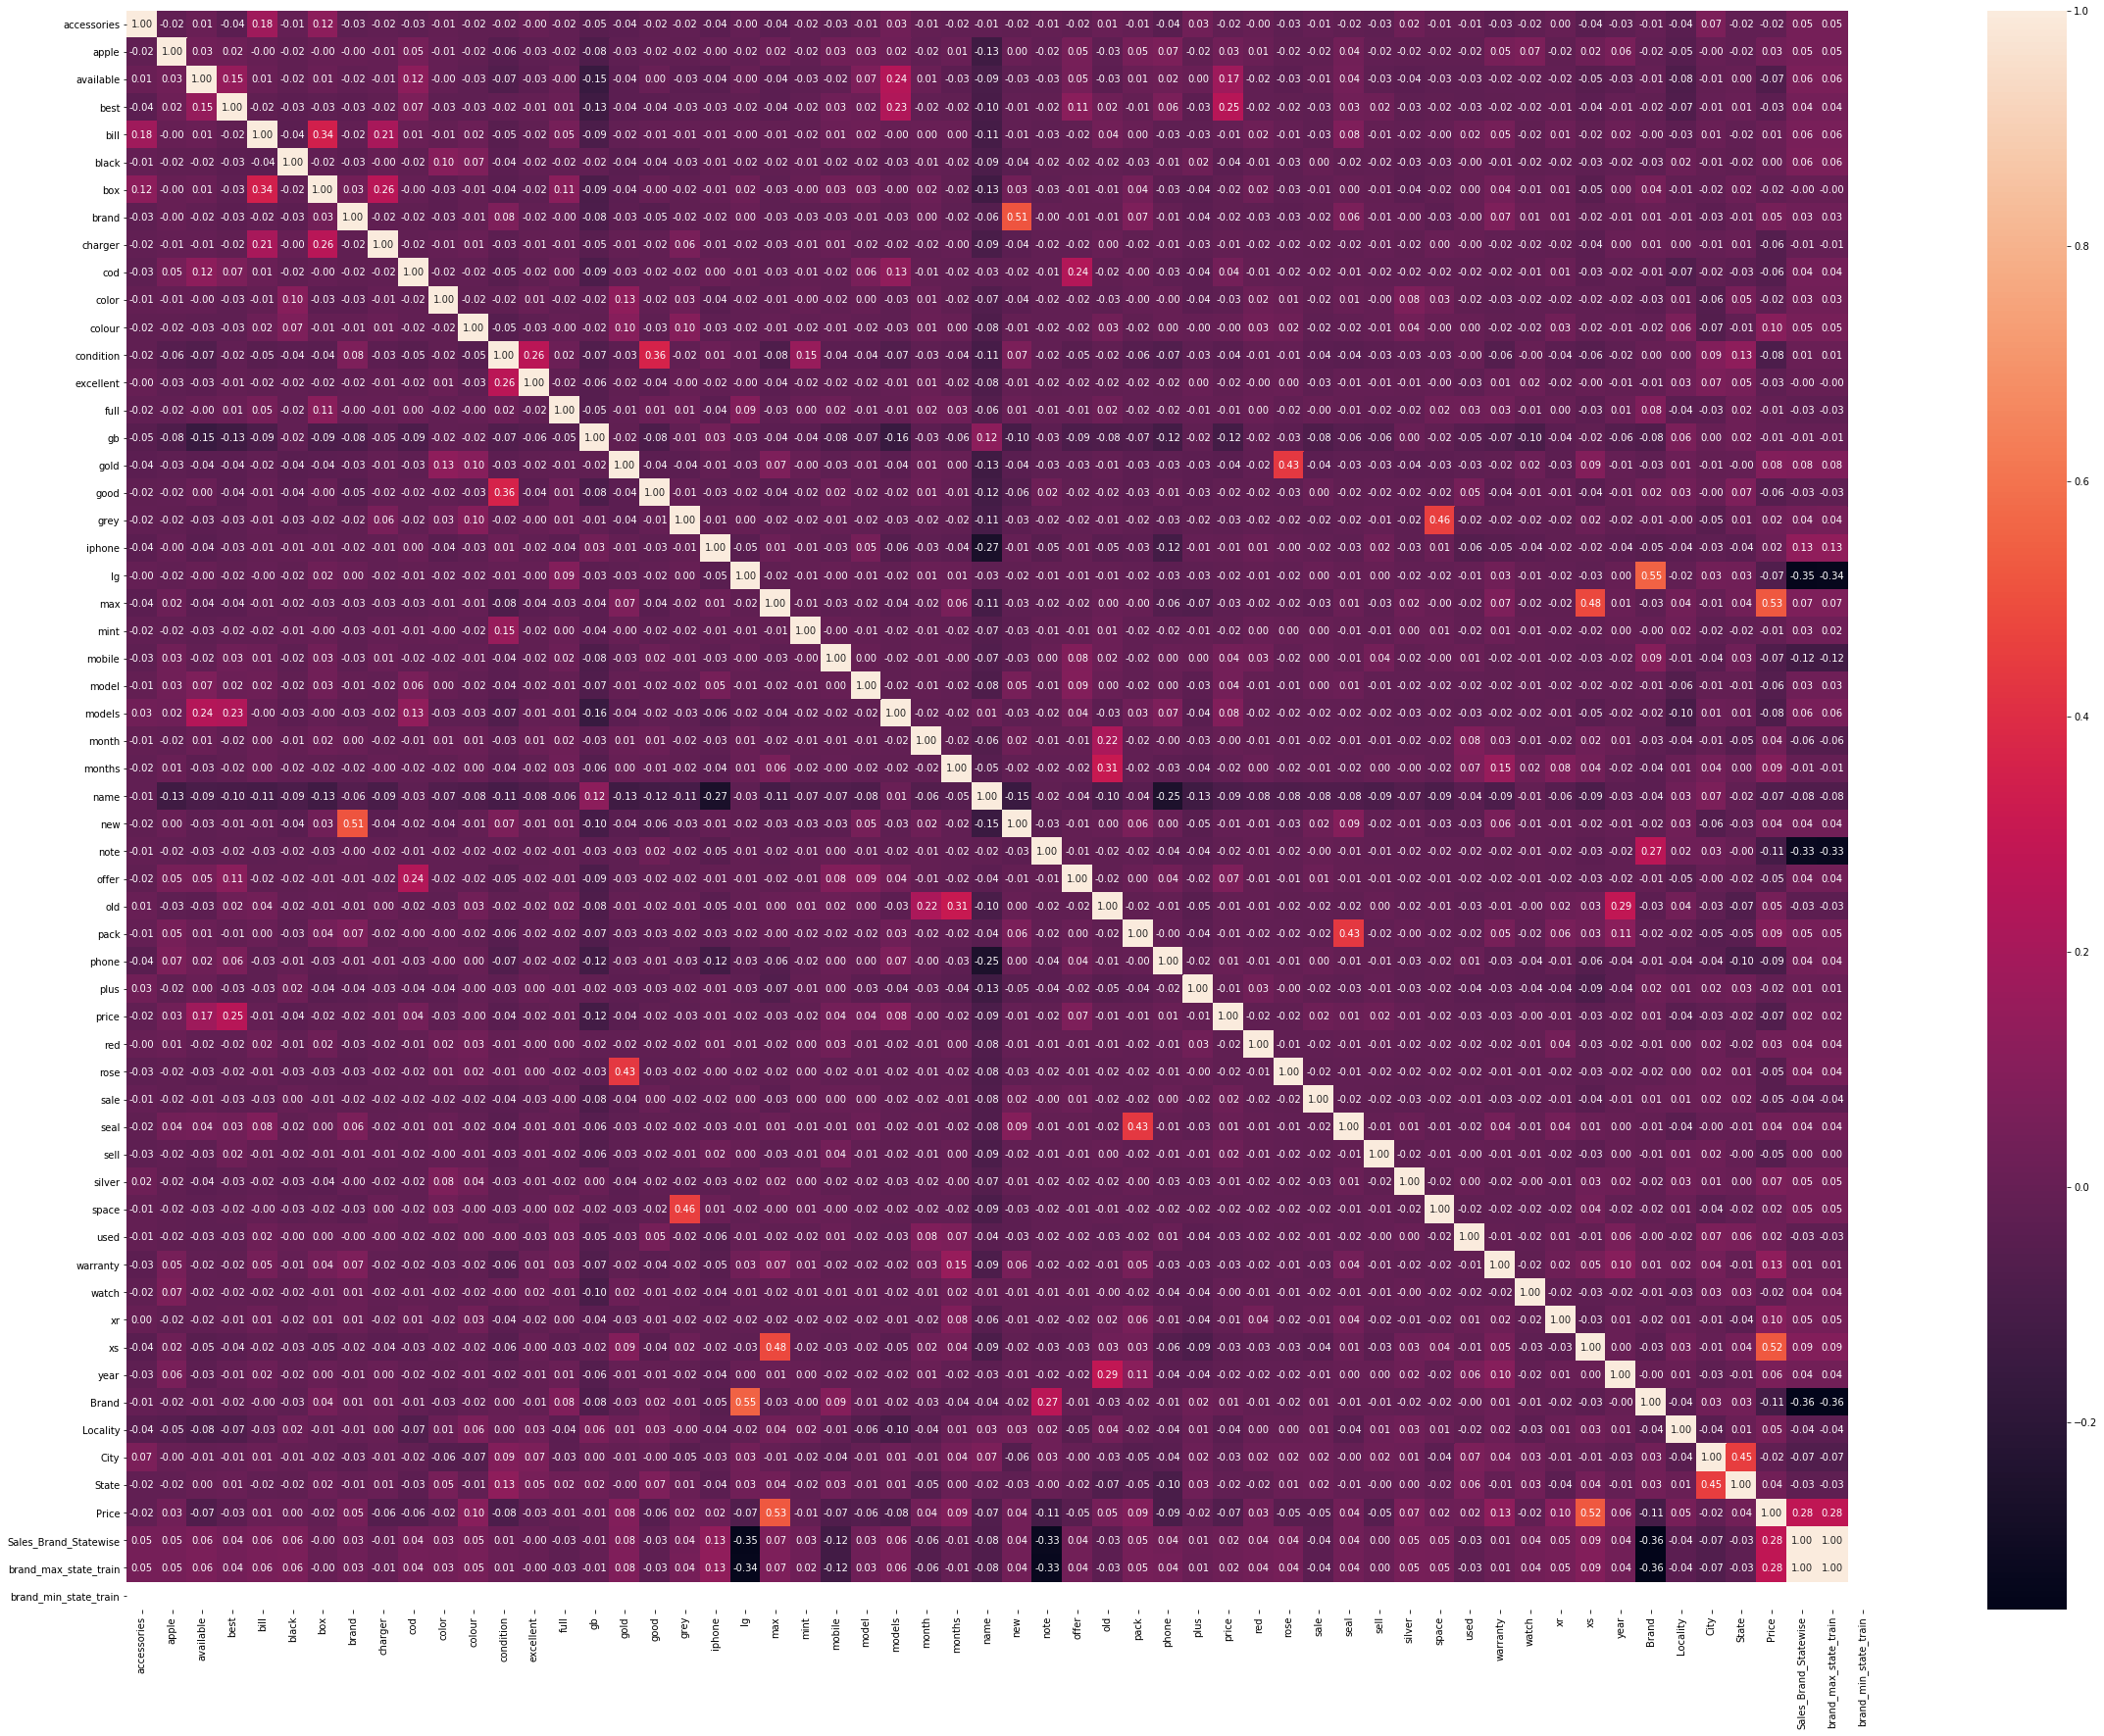

In [36]:
plt.figure(figsize=(40,30))
sns.heatmap(train.corr(),annot=True,fmt='.2f')

In [85]:
from pycaret.regression import *
reg1= setup(data = train, target = 'Price')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,4323
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(2326, 58)"
4,Missing Values,False
5,Numeric Features,51
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [86]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,10492.755800,233095419.655500,15173.204700,0.478000,0.681700,0.829800
1,Gradient Boosting Regressor,10516.959000,235075484.354000,15240.760500,0.473000,0.685200,0.840600
2,CatBoost Regressor,10482.602000,233962157.956800,15222.101800,0.472100,0.686000,0.824500
3,Ridge Regression,10872.714800,241407440.776300,15461.846000,0.456000,0.694000,0.835800
4,Lasso Least Angle Regression,10863.027600,241947744.555600,15477.393000,0.455000,0.695500,0.831400
5,Lasso Regression,10878.867900,242290962.983300,15489.142300,0.453900,0.711300,0.831600
6,Linear Regression,10886.543400,242434507.572700,15493.684900,0.453600,0.725900,0.831800
7,TheilSen Regressor,10784.530800,243284104.887600,15512.591800,0.453400,0.710700,0.826700
8,Light Gradient Boosting Machine,10658.882000,241235341.983500,15481.652200,0.449800,0.703700,0.812400
9,Random Forest,10476.897700,251586782.469700,15780.587900,0.432100,0.678600,0.785100


In [93]:
model_lr = tune_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,10632.9232,1.954019e+08,13978.6213,0.4982,0.7180,1.0133
1,11524.2366,3.111693e+08,17639.9912,0.3940,0.7921,1.1432
2,10814.2357,2.336038e+08,15284.1043,0.4286,0.6188,0.6639
3,10093.8450,1.635885e+08,12790.1734,0.5017,0.7901,0.9881
4,10486.8513,2.719444e+08,16490.7367,0.4255,0.7260,0.7223
5,10684.1493,2.392398e+08,15467.3795,0.4232,0.9547,0.8543
6,11309.4966,2.561606e+08,16005.0180,0.5022,0.6000,0.6094
7,10350.9526,1.858094e+08,13631.1919,0.3045,0.7168,0.8815
8,11114.9115,2.568304e+08,16025.9280,0.6201,0.7166,0.8990
9,11860.5772,3.105856e+08,17623.4389,0.4379,0.6254,0.5416


In [90]:
model_ridge= tune_model('ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,10597.4134,1.951558e+08,13969.8178,0.4988,0.6979,1.0159
1,11570.2101,3.114593e+08,17648.2107,0.3934,0.7959,1.1462
2,10798.2415,2.332651e+08,15273.0198,0.4294,0.6099,0.6618
3,10165.1758,1.638175e+08,12799.1222,0.5010,0.7862,1.0160
4,10390.4882,2.663145e+08,16319.1440,0.4374,0.6930,0.7200
5,10681.7351,2.376746e+08,15416.6987,0.4269,0.7329,0.8590
6,11289.0195,2.542632e+08,15945.6315,0.5059,0.5949,0.6084
7,10347.5977,1.847318e+08,13591.6074,0.3085,0.7208,0.8836
8,11160.4237,2.585791e+08,16080.3946,0.6176,0.7027,0.9062
9,11703.1138,3.086848e+08,17569.4290,0.4413,0.6179,0.5304


In [96]:
model_rf = tune_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,9374.7459,1.784150e+08,13357.2071,0.5418,0.6525,0.8501
1,11381.6639,3.237557e+08,17993.2124,0.3695,0.7964,0.9918
2,10035.0600,2.187877e+08,14791.4729,0.4648,0.6075,0.6034
3,8874.3562,1.402906e+08,11844.4345,0.5727,0.7079,0.9372
4,9176.5623,2.478551e+08,15743.4143,0.4764,0.6271,0.6235
5,9812.4431,2.267151e+08,15057.0630,0.4534,0.6613,0.6964
6,10139.0444,2.320489e+08,15233.1528,0.5491,0.5611,0.5148
7,9320.7930,1.678069e+08,12954.0290,0.3719,0.6825,0.7952
8,10519.8246,2.654722e+08,16293.3175,0.6074,0.6651,0.7626
9,10288.6805,2.998663e+08,17316.6495,0.4573,0.5500,0.4455


In [92]:
model_ridge

Ridge(alpha=0.917, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=4323, solver='auto', tol=0.001)

In [87]:
model_catboost = tune_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,10166.0157,1.802367e+08,13425.2250,0.5372,0.7009,1.0311
1,11645.7137,3.094726e+08,17591.8340,0.3973,0.7980,1.0588
2,10770.8759,2.286660e+08,15121.7055,0.4406,0.6408,0.7207
3,9439.1889,1.414675e+08,11894.0112,0.5691,0.7429,1.0428
4,10088.2975,2.483111e+08,15757.8893,0.4754,0.6646,0.7532
5,10210.0574,2.215406e+08,14884.2413,0.4658,0.6904,0.8410
6,10765.2246,2.348166e+08,15323.7256,0.5437,0.5819,0.5940
7,9976.0893,1.718394e+08,13108.7543,0.3568,0.7095,0.8927
8,11165.4506,2.707429e+08,16454.2662,0.5996,0.7211,0.9173
9,10840.5428,2.871090e+08,16944.2919,0.4803,0.5540,0.5166


In [54]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=4, missing=None, n_estimators=20,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=625,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.1, verbosity=0)

In [82]:
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.4, max_depth=10,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.1,
              n_estimators=30, n_jobs=-1, num_leaves=100, objective=None,
              random_state=625, reg_alpha=0.3, reg_lambda=0.3, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [88]:
model_catboost 

## Cross Validation

In [98]:
model_rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=70, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=4323, verbose=0, warm_start=False)

In [103]:
rf1 = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=4323, verbose=0, warm_start=False)

In [105]:
rf2 = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=7, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=4323, verbose=0, warm_start=False)

In [107]:
rf3 = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=4323, verbose=0, warm_start=False)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_log_error

cv = StratifiedKFold(n_splits=10,random_state=22,shuffle=True)
#
score_avg = []
#
for (train_index, test_index), i in zip(cv.split(train.drop('Price',axis=1),train['Price']), range(10)):
    
    #m = model_xgb
    #m = model_catboost 
    #m = model_ridge
    #m= model_lr
    #m = model_rf 0.624351797706622
    #m = rf1  0.6226330418074276
    #m = rf2 0.6329911324626322
    m = rf3 #0.6232911279140331
    
    m.fit(train.drop('Price',axis=1).iloc[train_index], train['Price'].iloc[train_index])
    y_pred = np.abs(m.predict(train.drop('Price',axis=1).iloc[test_index]))
    score_avg.append(np.sqrt(mean_squared_log_error(train['Price'].iloc[test_index],y_pred)))
#
print(pd.DataFrame(data=score_avg))
print(sum(score_avg)/len(score_avg))

## Stacking Classifier

In [71]:
from mlxtend.regressor import StackingCVRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import lightgbm as lgb
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

In [72]:
X = train.drop(['Price'],axis=1)
Y = train['Price']

In [95]:
model_lr

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

In [100]:
lr = model_lr
rf = model_rf
ridge = model_ridge
#svr_rbf = SVR(kernel='rbf')
xgb = model_xgb
lgbm = model_lgb
cat = model_catboost 
stregr = StackingRegressor(regressors=[rf, lr, ridge,cat,lgbm,xgb], 
                           meta_regressor=xgb)

In [102]:
cv = StratifiedKFold(n_splits=10,random_state=22,shuffle=True)
#
score_avg = []
#
for (train_index, test_index), i in zip(cv.split(train.drop('Price',axis=1),train['Price']), range(10)):
    
    m = StackingRegressor(regressors=[lr, ridge,cat,lgbm,rf,xgb], 
                           meta_regressor=rf)
    m.fit(train.drop('Price',axis=1).iloc[train_index], train['Price'].iloc[train_index])
    y_pred = np.abs(m.predict(train.drop('Price',axis=1).iloc[test_index]))
    score_avg.append(np.sqrt(mean_squared_log_error(train['Price'].iloc[test_index],y_pred)))
#
print(pd.DataFrame(data=score_avg))
print(sum(score_avg)/len(score_avg))

          0
0  0.614116
1  0.672448
2  0.653669
3  0.656353
4  0.662388
5  0.651867
6  0.678723
7  0.641558
8  0.717268
9  0.747329
0.6695718665873078


In [84]:
cv = StratifiedKFold(n_splits=10,random_state=22,shuffle=True)
#
score_avg = []
#
for (train_index, test_index), i in zip(cv.split(train.drop('Price',axis=1),train['Price']), range(10)):
    
    m = StackingRegressor(regressors=[svr_lin, lr, ridge,xgb], 
                           meta_regressor=xgb)
    m.fit(train.drop('Price',axis=1).iloc[train_index], train['Price'].iloc[train_index])
    y_pred = np.abs(m.predict(train.drop('Price',axis=1).iloc[test_index]))
    score_avg.append(np.sqrt(mean_squared_log_error(train['Price'].iloc[test_index],y_pred)))
#
print(pd.DataFrame(data=score_avg))
print(sum(score_avg)/len(score_avg))

C:\Users\INTEL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


          0
0  0.595833
1  0.668137
2  0.651906
3  0.582246
4  0.627870
5  0.635494
6  0.644395
7  0.619646
8  0.686632
9  0.716443
0.6428602070078553


In [109]:
cv = StratifiedKFold(n_splits=10,random_state=22,shuffle=True)
#
score_avg = []
#
for (train_index, test_index), i in zip(cv.split(train.drop('Price',axis=1),train['Price']), range(10)):
    
    m = StackingRegressor(regressors=[lr, ridge,rf3,xgb], 
                           meta_regressor=xgb)
    m.fit(train.drop('Price',axis=1).iloc[train_index], train['Price'].iloc[train_index])
    y_pred = np.abs(m.predict(train.drop('Price',axis=1).iloc[test_index]))
    score_avg.append(np.sqrt(mean_squared_log_error(train['Price'].iloc[test_index],y_pred)))
#
print(pd.DataFrame(data=score_avg))
print(sum(score_avg)/len(score_avg))

          0
0  0.580984
1  0.659165
2  0.624053
3  0.564727
4  0.603755
5  0.638673
6  0.639291
7  0.620991
8  0.666461
9  0.696782
0.6294882009056585


## Considering Random Forest Regressor as RMSLE  is the lowest : 0.623

In [110]:
X.columns

Index(['accessories', 'apple', 'available', 'best', 'bill', 'black', 'box',
       'brand', 'charger', 'cod', 'color', 'colour', 'condition', 'excellent',
       'full', 'gb', 'gold', 'good', 'grey', 'iphone', 'lg', 'max', 'mint',
       'mobile', 'model', 'models', 'month', 'months', 'name', 'new', 'note',
       'offer', 'old', 'pack', 'phone', 'plus', 'price', 'red', 'rose', 'sale',
       'seal', 'sell', 'silver', 'space', 'used', 'warranty', 'watch', 'xr',
       'xs', 'year', 'Brand', 'Locality', 'City', 'State',
       'Sales_Brand_Statewise', 'brand_max_state_train',
       'brand_min_state_train'],
      dtype='object')

In [126]:
rf4 = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=4323, verbose=0, warm_start=False)

In [127]:
score_avg = []
#
for (train_index, test_index), i in zip(cv.split(train.drop('Price',axis=1),train['Price']), range(10)):
    
    #m = model_xgb
    #m = model_catboost 
    #m = model_ridge
    #m= model_lr
    #m = model_rf 0.624351797706622
    #m = rf1  0.6226330418074276
    #m = rf2 0.6329911324626322
    #m = rf3 #0.6232911279140331
    m = rf4 #0.622686
    
    m.fit(train.drop('Price',axis=1).iloc[train_index], train['Price'].iloc[train_index])
    y_pred = np.abs(m.predict(train.drop('Price',axis=1).iloc[test_index]))
    score_avg.append(np.sqrt(mean_squared_log_error(train['Price'].iloc[test_index],y_pred)))
#
print(pd.DataFrame(data=score_avg))
print(sum(score_avg)/len(score_avg))

          0
0  0.546999
1  0.647004
2  0.619564
3  0.570537
4  0.618704
5  0.623236
6  0.617968
7  0.628666
8  0.653462
9  0.700723
0.6226863320346457


In [ ]:
## RF3 feature importance

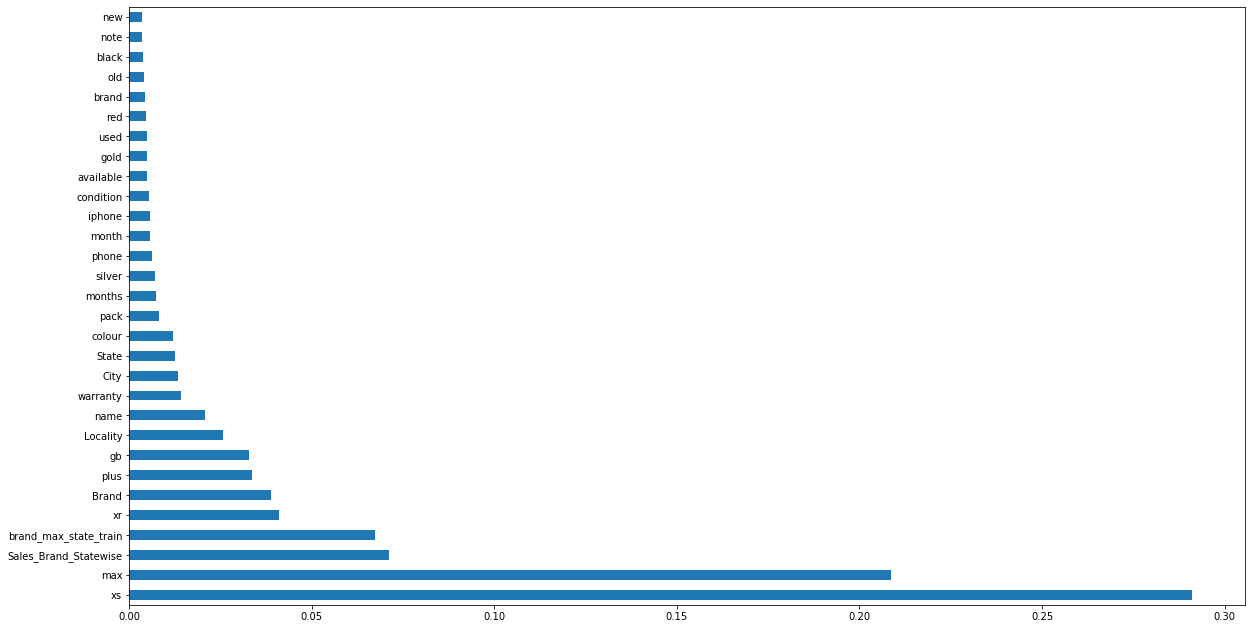

In [124]:
feature_imp = pd.Series(rf3.feature_importances_,index=X.columns)
feature_imp.nlargest(30).plot(kind='barh',figsize=(20,11))

In [ ]:
## Final Predictions

In [129]:
test.shape,X.shape

((997, 57), (2326, 57))

In [130]:
predictions = rf4.predict(test)

In [131]:
test['Price'] = predictions

In [132]:
test.head()

,accessories,apple,available,best,bill,black,box,brand,charger,cod,...,xs,year,Brand,Locality,City,State,Sales_Brand_Statewise,brand_max_state_train,brand_min_state_train,Price
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,570,11,4,892,8,0,12227.181
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,762,8,2,892,8,0,14221.715
2,0.0,0.0,0.0,0.0,0.594109,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,60,13,5,892,8,0,13254.140
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,640,15,5,892,8,0,15091.172
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,816,2,6,892,8,0,14754.778


In [135]:
test['Price'].to_excel('rfexcel.xlsx',index=False)